In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/employees_data.csv')

In [ ]:
df.head()

,Employee_ID,First_Name,Last_Name,Department,Salary,Join_Date,Age,City
0,1101,Max,Moore,Finance,64904,2015-01-31,49,Dallas
1,1102,Max,Doe,Operations,62488,2013-01-10,40,Los Angeles
2,1103,Lucas,Black,Finance,107951,2017-05-26,52,New York
3,1104,Charlie,Davis,Marketing,84243,2023-02-18,34,San Diego
4,1105,Lucas,Black,Marketing,102331,2018-12-05,36,Phoenix


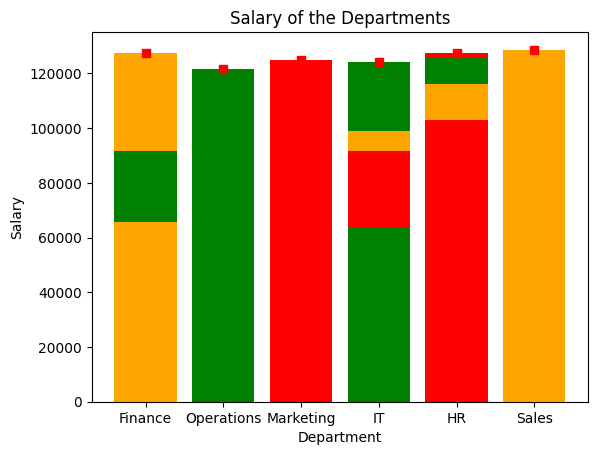

In [ ]:
import matplotlib.pyplot as plt

maximum = df.groupby(df['Department'])['Salary'].max()


plt.bar(df['Department'], df['Salary'], color=['green', 'red', 'orange'])
plt.scatter(maximum.index, maximum.values,  marker = 's', color= 'red')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.title('Salary of the Departments')
plt.show()

In [ ]:

maximum_value = pd.to_numeric(df['Salary'], errors='coerce').max()
print("Maximum value:", maximum_value)

Maximum value: 128673


In [ ]:
maximum

,Salary
Department,
Finance,127512
HR,127460
IT,124079
Marketing,124765
Operations,121548
Sales,128673


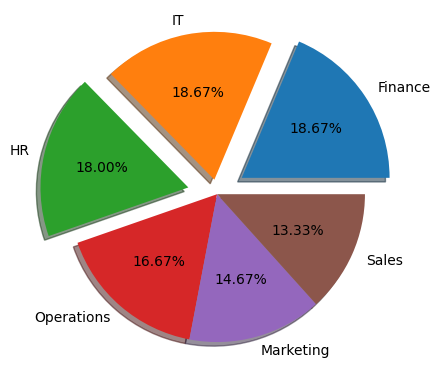

In [ ]:
department_count = df['Department'].value_counts()

plt.pie(department_count, labels=department_count.index, autopct='%1.2f%%', explode=[0.2,0.1,0.2,0,0,0], shadow=True)
plt.show()

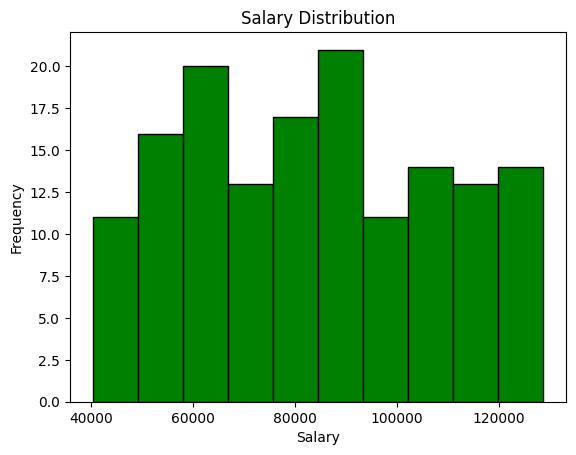

In [ ]:
#histogram plot

plt.hist(df['Salary'], bins=10, color='green', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

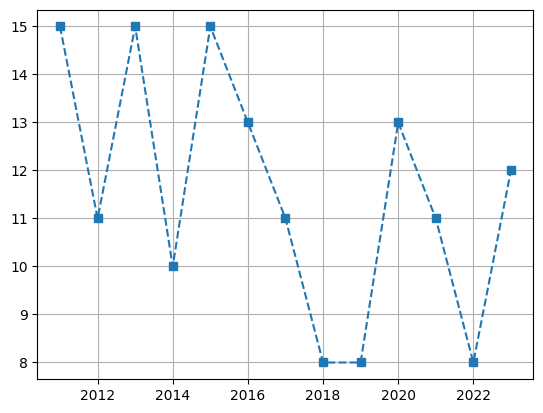

In [ ]:
#yearly join person

df['join_Date']= pd.to_datetime(df['Join_Date']).dt.year
trend = df['join_Date'].value_counts().sort_index()

plt.plot(trend.index, trend.values, linestyle='--', marker='s')
plt.grid(True)
plt.show()

In [ ]:
df['join_Date']
print(trend)

join_Date
2011    15
2012    11
2013    15
2014    10
2015    15
2016    13
2017    11
2018     8
2019     8
2020    13
2021    11
2022     8
2023    12
Name: count, dtype: int64


In [ ]:
import seaborn as sns

In [ ]:
df.loc[97, 'Salary'] = 196660

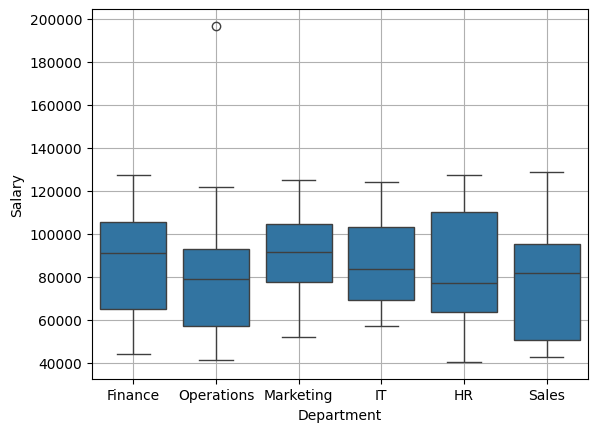

In [ ]:
#box plot of salary and versus department
sns.boxplot(x=df['Department'], y=df['Salary'])
plt.grid(True)
plt.show()

In [ ]:
# pivot table

pivot = df.pivot_table(index='Department', columns='City', values='Salary')
pivot

City,Chicago,Dallas,Houston,Los Angeles,New York,Phoenix,San Diego
Department,,,,,,,
Finance,74182.500000,84321.666667,79285.000000,101287.666667,95448.8,99816.333333,83951.0
HR,96609.000000,70416.833333,69855.000000,NaN,86032.2,82593.000000,82094.0
IT,87220.400000,94737.250000,111279.000000,77888.600000,87562.0,84636.250000,78975.6
Marketing,111418.500000,95763.000000,NaN,83097.000000,89718.0,98083.250000,76707.0
Operations,57190.000000,72692.333333,72594.666667,89021.222222,100710.5,89992.500000,77550.2
Sales,63217.666667,75371.666667,91119.666667,63081.666667,95042.5,71043.000000,50641.0


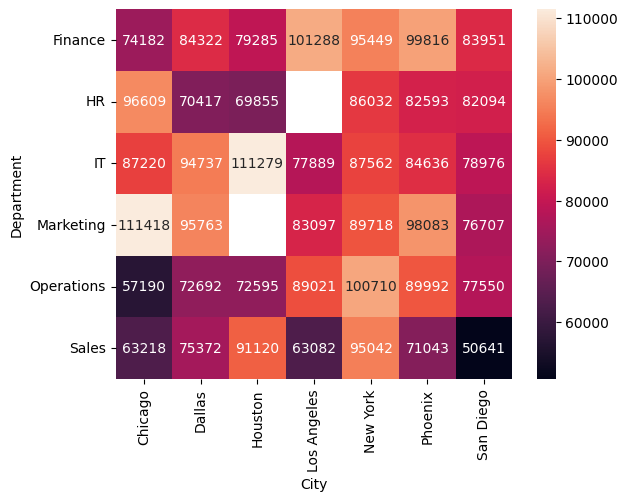

In [ ]:
sns.heatmap(pivot, annot=True, fmt='.0f')
plt.show()

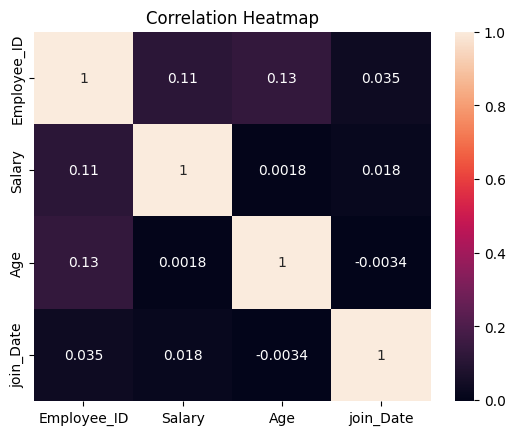

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df
correlation = numeric_df.corr()
correlation
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()